<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction-Part IV Feature Eng. & Feature Selection

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Importing Pickel file tmdb_clean

In [5]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_clean = pickle.load(file)
    print(f"tmdb_clean loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_clean.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
tmdb_clean loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl successfully.
              name        id  number_of_seasons  number_of_episodes  \
0          minutes   39280.0                  1                 0.0   
1              man  222838.6                  1                 5.0   
2   erne tur retur  222838.6                  1                10.0   
3                    34835.0                  1                12.0   
4             bama   42598.0                  1                 0.0   

   vote_count  vote_average first_air_date last_air_date  popularity  type  \
0           0           0.0            NaT           NaT    0.470004     4   
1           3           7.7     2023-05-28    2023-06-25    1.723837     4   
2           0           0.0     2014-05-15    2014-07-17    0.470004     4   
3           5           6.4     2006-10-06    2006-12-22    2.375928     4   
4           0           0.0            NaT     

# The tmdb_clean Analysis

In [6]:
tmdb_clean.head(10)

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,popularity_log,adult_True,air_time
0,minutes,39280.00,1,0.0,0,0.0,NaT,NaT,0.470004,4,19,20,6,18,19,18,30,0.385265,0,56.0
1,man,222838.60,1,5.0,3,7.7,2023-05-28,2023-06-25,1.723837,4,12,20,10,18,12,18,50,1.002042,0,28.0
2,erne tur retur,222838.60,1,10.0,0,0.0,2014-05-15,2014-07-17,0.470004,4,19,20,13,18,5,18,0,0.385265,0,63.0
3,,34835.00,1,12.0,5,6.4,2006-10-06,2006-12-22,2.375928,4,19,20,10,18,12,18,30,1.216670,0,77.0
4,bama,42598.00,1,0.0,0,0.0,NaT,NaT,0.470004,4,5,20,13,18,20,18,0,0.385265,0,56.0
5,,5623.55,1,0.0,0,0.0,NaT,NaT,0.470004,4,19,20,13,4,2,18,0,0.385265,0,56.0
6,,53608.00,1,0.0,0,0.0,NaT,NaT,0.470004,4,19,20,4,18,20,18,0,0.385265,0,56.0
7,,222838.60,1,3.0,0,0.0,2021-08-30,2021-09-01,0.622725,0,11,20,6,18,19,18,0,0.484107,0,2.0
8,nt,57291.00,1,0.0,0,0.0,NaT,NaT,0.470004,4,19,20,13,18,20,18,0,0.385265,0,56.0
9,s_wr,60387.00,1,1.0,0,0.0,NaT,2013-10-06,0.470004,4,19,20,13,18,20,18,0,0.385265,0,56.0


# Dataset tmdb.clean Describe

In [7]:
tmdb_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
id,82872.0,78470.907334,5623.55,28477.75,58982.5,109999.5,222838.6,64120.493309
number_of_seasons,82872.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
number_of_episodes,82872.0,13.324706,0.0,1.0,6.0,20.0,48.5,15.845608
vote_count,82872.0,1.197256,0.0,0.0,0.0,2.0,5.0,1.818078
vote_average,82872.0,2.772366,0.0,0.0,0.0,6.7,9.0,3.518389
first_air_date,62883,2006-04-09 17:39:24.448261120,1921-01-01 00:00:00,1999-11-01 12:00:00,2010-05-01 00:00:00,2017-08-25 00:00:00,2024-04-23 00:00:00,NaN
last_air_date,63444,2007-04-29 04:34:50.410440704,1921-07-09 00:00:00,2001-06-19 18:00:00,2011-03-29 00:00:00,2018-04-28 00:00:00,2024-04-04 00:00:00,NaN
popularity,82872.0,1.037404,0.470004,0.470004,0.688135,1.385294,2.758229,0.734381
type,82872.0,3.362873,0.0,4.0,4.0,4.0,4.0,1.322554
genres,82872.0,14.485435,3.0,11.0,19.0,19.0,19.0,5.518472


In [8]:
tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  float64       
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

In [9]:
tmdb_clean.agg('count')

,0
name,82872
id,82872
number_of_seasons,82872
number_of_episodes,82872
vote_count,82872
vote_average,82872
first_air_date,62883
last_air_date,63444
popularity,82872
type,82872


# Analizing  DataSet tmdb_clean

# Initial Exploration

**Data Shape and Structure:**

In [10]:
tmdb_clean.shape  # Get the number of rows and columns
tmdb_clean.head() # Display the first few rows to get a glimpse of the data
tmdb_clean.info() # Get information about data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  float64       
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

# Descriptive Statistics:

In [11]:
tmdb_clean.describe() # Get summary statistics for numerical columns
tmdb_clean.describe(include='object') # Include categorical columns

,name
count,82872
unique,82429
top,
freq,72


# Univariate Analysis

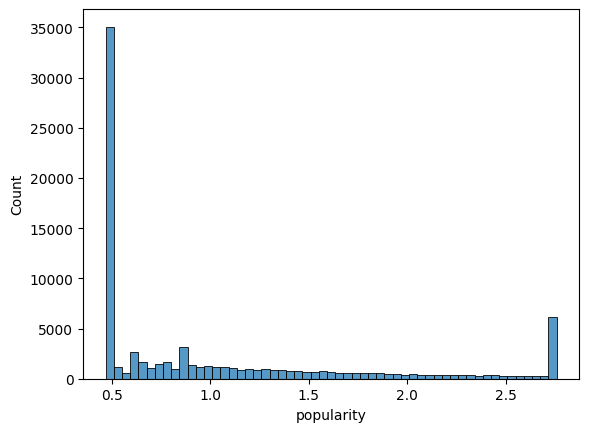

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tmdb_clean['popularity'])
plt.show()

# Categorical Features:

**Frequency Counts:**

Create bar charts or count plots to see the frequency of each category in categorical features like genres, origin_country, etc.

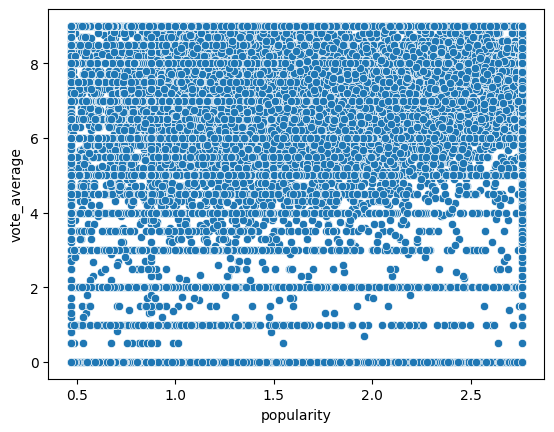

,popularity,vote_average,vote_count
popularity,1.000000,0.533338,0.676992
vote_average,0.533338,1.000000,0.777439
vote_count,0.676992,0.777439,1.000000


In [13]:
sns.scatterplot(x='popularity', y='vote_average', data=tmdb_clean)

plt.show()

tmdb_clean[['popularity', 'vote_average', 'vote_count']].corr()

# Categorical vs. Numerical:

Analyze the relationship between categorical and numerical features using box plots or violin plots.

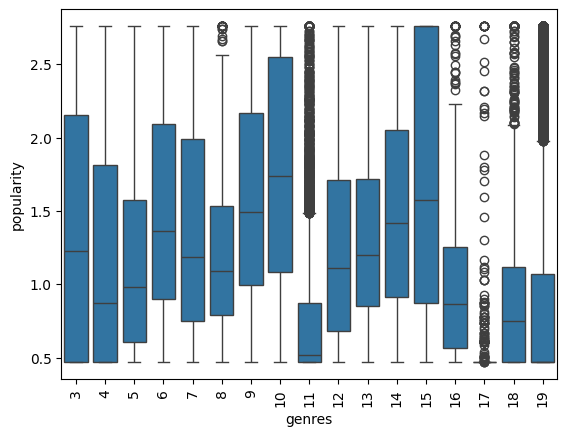

In [14]:
sns.boxplot(x='genres', y='popularity', data=tmdb_clean)
plt.xticks(rotation=90)
plt.show()

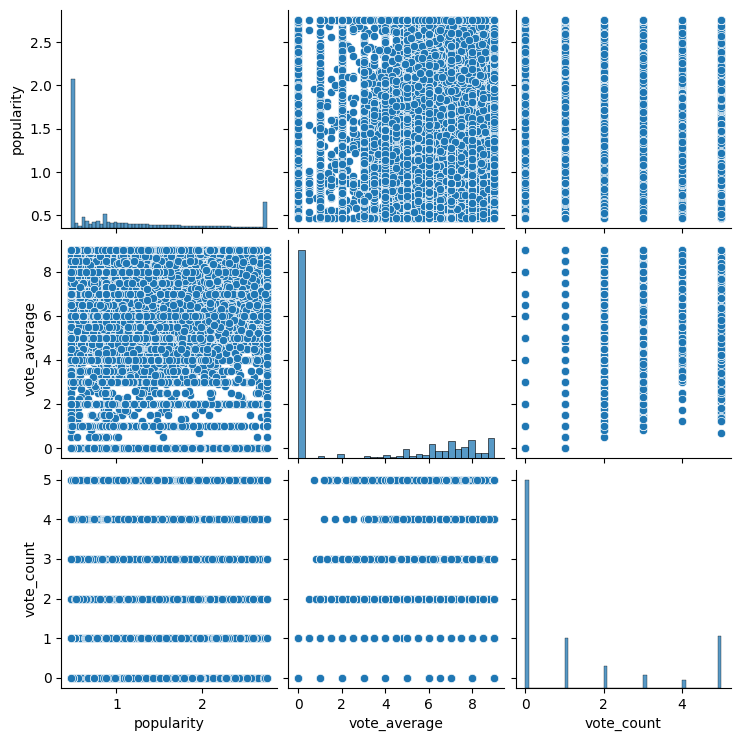

In [15]:
sns.pairplot(tmdb_clean[['popularity', 'vote_average', 'vote_count']])
plt.show()

# Heatmaps:

Visualize correlation matrices using heatmaps for a clearer view of feature relationships.

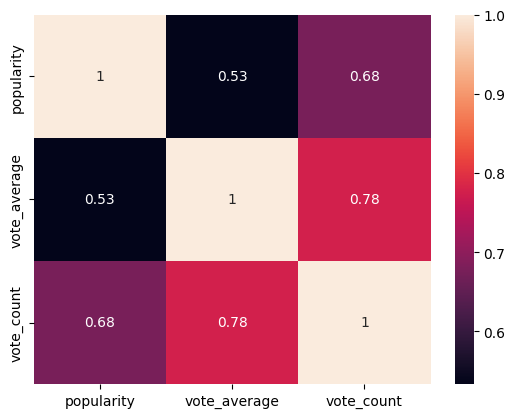

In [16]:
sns.heatmap(tmdb_clean[['popularity', 'vote_average', 'vote_count']].corr(), annot=True)
plt.show()

#  Multivariate Analysis -  Pair Plots:

reate pair plots to visualize relationships between multiple numerical features simultaneously.

<ipython-input-17-2c966223017d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmdb_clean['log_popularity'], kde=True)  # kde=True shows the kernel density estimate


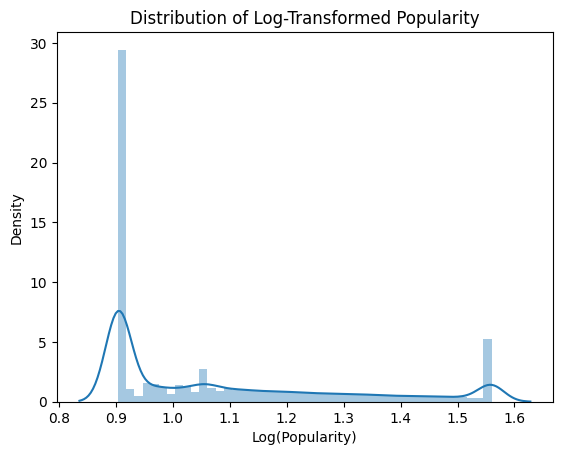

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Using  tmdb_clean as the  DataFrame

# Apply log transformation to 'popularity' and handle potential zeros or negative values
tmdb_clean['log_popularity'] = np.log1p(1+tmdb_clean['popularity'])  # log1p(x) = log(1 + x)

# Create the distplot
sns.distplot(tmdb_clean['log_popularity'], kde=True)  # kde=True shows the kernel density estimate
plt.title('Distribution of Log-Transformed Popularity')
plt.xlabel('Log(Popularity)')
plt.ylabel('Density')
plt.show()


# Feature Eng. & Selection
Enriching: Create new features from existing ones

In [18]:
tmdb_eng=tmdb_clean.copy()
tmdb_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  float64       
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

#Enriching:

Creating new features from existing ones to better capture the underlying patterns in the data. This can involve mathematical transformations, aggregations, or domain-specific knowledge.

In [19]:
import pandas as pd
import numpy as np

# Uing tmdb_eng as DataFrame

# 1. Average episode runtime per number_of_seasons:
tmdb_eng['avg_episode_runtime_per_number_of_seasons'] = tmdb_eng['episode_run_time'] / tmdb_eng['number_of_seasons']

# 2. Total runtime of the show:
tmdb_eng['total_runtime'] = tmdb_eng['episode_run_time'] * tmdb_eng['number_of_episodes']

# 3. Production company count:
# Convert to string before using str accessor
tmdb_eng['production_company_count'] = tmdb_eng['production_companies'].astype(str).str.split(',').str.len()

# 4. Network count:
# Convert to string before using str accessor
tmdb_eng['network_count'] = tmdb_eng['networks'].astype(str).str.split(',').str.len()

# 5. Genre count:
# Convert to string before using str accessor
tmdb_eng['genre_count'] = tmdb_eng['genres'].astype(str).str.split(',').str.len()

# 6. Origin country count (if multiple):
# Convert to string before using str accessor
tmdb_eng['origin_country_count'] = tmdb_eng['origin_country'].astype(str).str.split(',').str.len()

# 7. Created by count (if multiple):
# Convert to string before using str accessor
tmdb_eng['created_by_count'] = tmdb_eng['created_by'].astype(str).str.split(',').str.len()

# 8. Vote count to number of episodes ratio:
tmdb_eng['vote_count_to_episodes_ratio'] = tmdb_eng['vote_count'] / tmdb_eng['number_of_episodes']

# 9. Vote average weighted by vote count:
tmdb_eng['weighted_vote_average'] = tmdb_eng['vote_average'] * tmdb_eng['vote_count']

# 10. Popularity score (combination of existing metrics):
# You can experiment with different weights/coefficients
tmdb_eng['popularity_score'] = (
    0.5 * tmdb_eng['popularity'] +
    0.3 * tmdb_eng['vote_average'] +
    0.2 * tmdb_eng['vote_count']
)

# Display the updated DataFrame with new features
tmdb_eng.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score
0,minutes,39280.0,1,0.0,0,0.0,NaT,NaT,0.470004,4,...,30.0,0.0,1,1,1,1,1,NaN,0.0,0.235002
1,man,222838.6,1,5.0,3,7.7,2023-05-28,2023-06-25,1.723837,4,...,50.0,250.0,1,1,1,1,1,0.600000,23.1,3.771919
2,erne tur retur,222838.6,1,10.0,0,0.0,2014-05-15,2014-07-17,0.470004,4,...,0.0,0.0,1,1,1,1,1,0.000000,0.0,0.235002
3,,34835.0,1,12.0,5,6.4,2006-10-06,2006-12-22,2.375928,4,...,30.0,360.0,1,1,1,1,1,0.416667,32.0,4.107964
4,bama,42598.0,1,0.0,0,0.0,NaT,NaT,0.470004,4,...,0.0,0.0,1,1,1,1,1,NaN,0.0,0.235002


In [20]:
tmdb_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   name                                       82872 non-null  object        
 1   id                                         82872 non-null  float64       
 2   number_of_seasons                          82872 non-null  int64         
 3   number_of_episodes                         82872 non-null  float64       
 4   vote_count                                 82872 non-null  int64         
 5   vote_average                               82872 non-null  float64       
 6   first_air_date                             62883 non-null  datetime64[ns]
 7   last_air_date                              63444 non-null  datetime64[ns]
 8   popularity                                 82872 non-null  float64       
 9   type             

# Normalization/Standardization:
  
Bringing Features to a Common Scale

In machine learning, many algorithms perform better when numerical features have similar ranges. This is because features with larger ranges can disproportionately influence the model, leading to biased results. Normalization and standardization are two common techniques used to address this issue.

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Using tmdb_eng as  DataFrame

# Select numerical features for scaling
numerical_features = ['number_of_episodes', 'number_of_seasons', 'vote_count', 'vote_average', 'popularity',
                      'episode_run_time', 'avg_episode_runtime_per_number_of_seasons', 'total_runtime',
                      'production_company_count', 'network_count', 'genre_count', 'origin_country_count',
                      'created_by_count']

# Replace infinite values with NaN
tmdb_eng[numerical_features] = tmdb_eng[numerical_features].replace([np.inf, -np.inf], np.nan)

# Impute NaN values (if any) with the median of the column
# (You can also use other strategies like mean or a constant value)
for feature in numerical_features:
    tmdb_eng[feature] = tmdb_eng[feature].fillna(tmdb_eng[feature].median())

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected numerical features and transform them
tmdb_eng[numerical_features] = scaler.fit_transform(tmdb_eng[numerical_features])

# Display the updated DataFrame with scaled features
tmdb_eng.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score
0,minutes,39280.0,0.0,-0.840914,-0.658532,-0.787969,NaT,NaT,-0.772628,4,...,0.200501,-0.609724,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.235002
1,man,222838.6,0.0,-0.525367,0.991572,1.400545,2023-05-28,2023-06-25,0.934715,4,...,1.031072,-0.217262,0.0,0.0,0.0,0.0,0.0,0.600000,23.1,3.771919
2,erne tur retur,222838.6,0.0,-0.209820,-0.658532,-0.787969,2014-05-15,2014-07-17,-0.772628,4,...,-1.045356,-0.609724,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.235002
3,,34835.0,0.0,-0.083601,2.091641,1.031056,2006-10-06,2006-12-22,1.822667,4,...,0.200501,-0.044579,0.0,0.0,0.0,0.0,0.0,0.416667,32.0,4.107964
4,bama,42598.0,0.0,-0.840914,-0.658532,-0.787969,NaT,NaT,-0.772628,4,...,-1.045356,-0.609724,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.235002


In [22]:
tmdb_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   name                                       82872 non-null  object        
 1   id                                         82872 non-null  float64       
 2   number_of_seasons                          82872 non-null  float64       
 3   number_of_episodes                         82872 non-null  float64       
 4   vote_count                                 82872 non-null  float64       
 5   vote_average                               82872 non-null  float64       
 6   first_air_date                             62883 non-null  datetime64[ns]
 7   last_air_date                              63444 non-null  datetime64[ns]
 8   popularity                                 82872 non-null  float64       
 9   type             

# Numeric (Continuous) Analysis:

Unveiling Insights from Numerical Data

Numeric (continuous) analysis involves examining numerical features in your dataset to understand their distributions, relationships, and potential impact on your machine learning models. It's a crucial step in the data exploration and preprocessing phase of a data science project.

In [23]:
#get all numeric data
#cols=df.columns
tmdb_num=tmdb_eng._get_numeric_data().dropna()
tmdb_num.shape

(64756, 28)

In [24]:
tmdb_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64756 entries, 1 to 82871
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         64756 non-null  float64
 1   number_of_seasons                          64756 non-null  float64
 2   number_of_episodes                         64756 non-null  float64
 3   vote_count                                 64756 non-null  float64
 4   vote_average                               64756 non-null  float64
 5   popularity                                 64756 non-null  float64
 6   type                                       64756 non-null  int64  
 7   genres                                     64756 non-null  int64  
 8   created_by                                 64756 non-null  int64  
 9   languages                                  64756 non-null  int64  
 10  networks                   

# Convert to Float

In data analysis and machine learning, it's often necessary to ensure that numerical columns are represented as float data types. This is because many algorithms and operations expect or perform better with float values. Here are some reasons for conversion:

Mathematical Operations: Performing calculations like addition, subtraction, multiplication, and division on numerical data often requires float values for accuracy.
Algorithm Compatibility: Many machine learning algorithms expect features to be represented as floats for proper functionality and performance.
Data Consistency: Maintaining consistency in data types can simplify data manipulation and analysis.

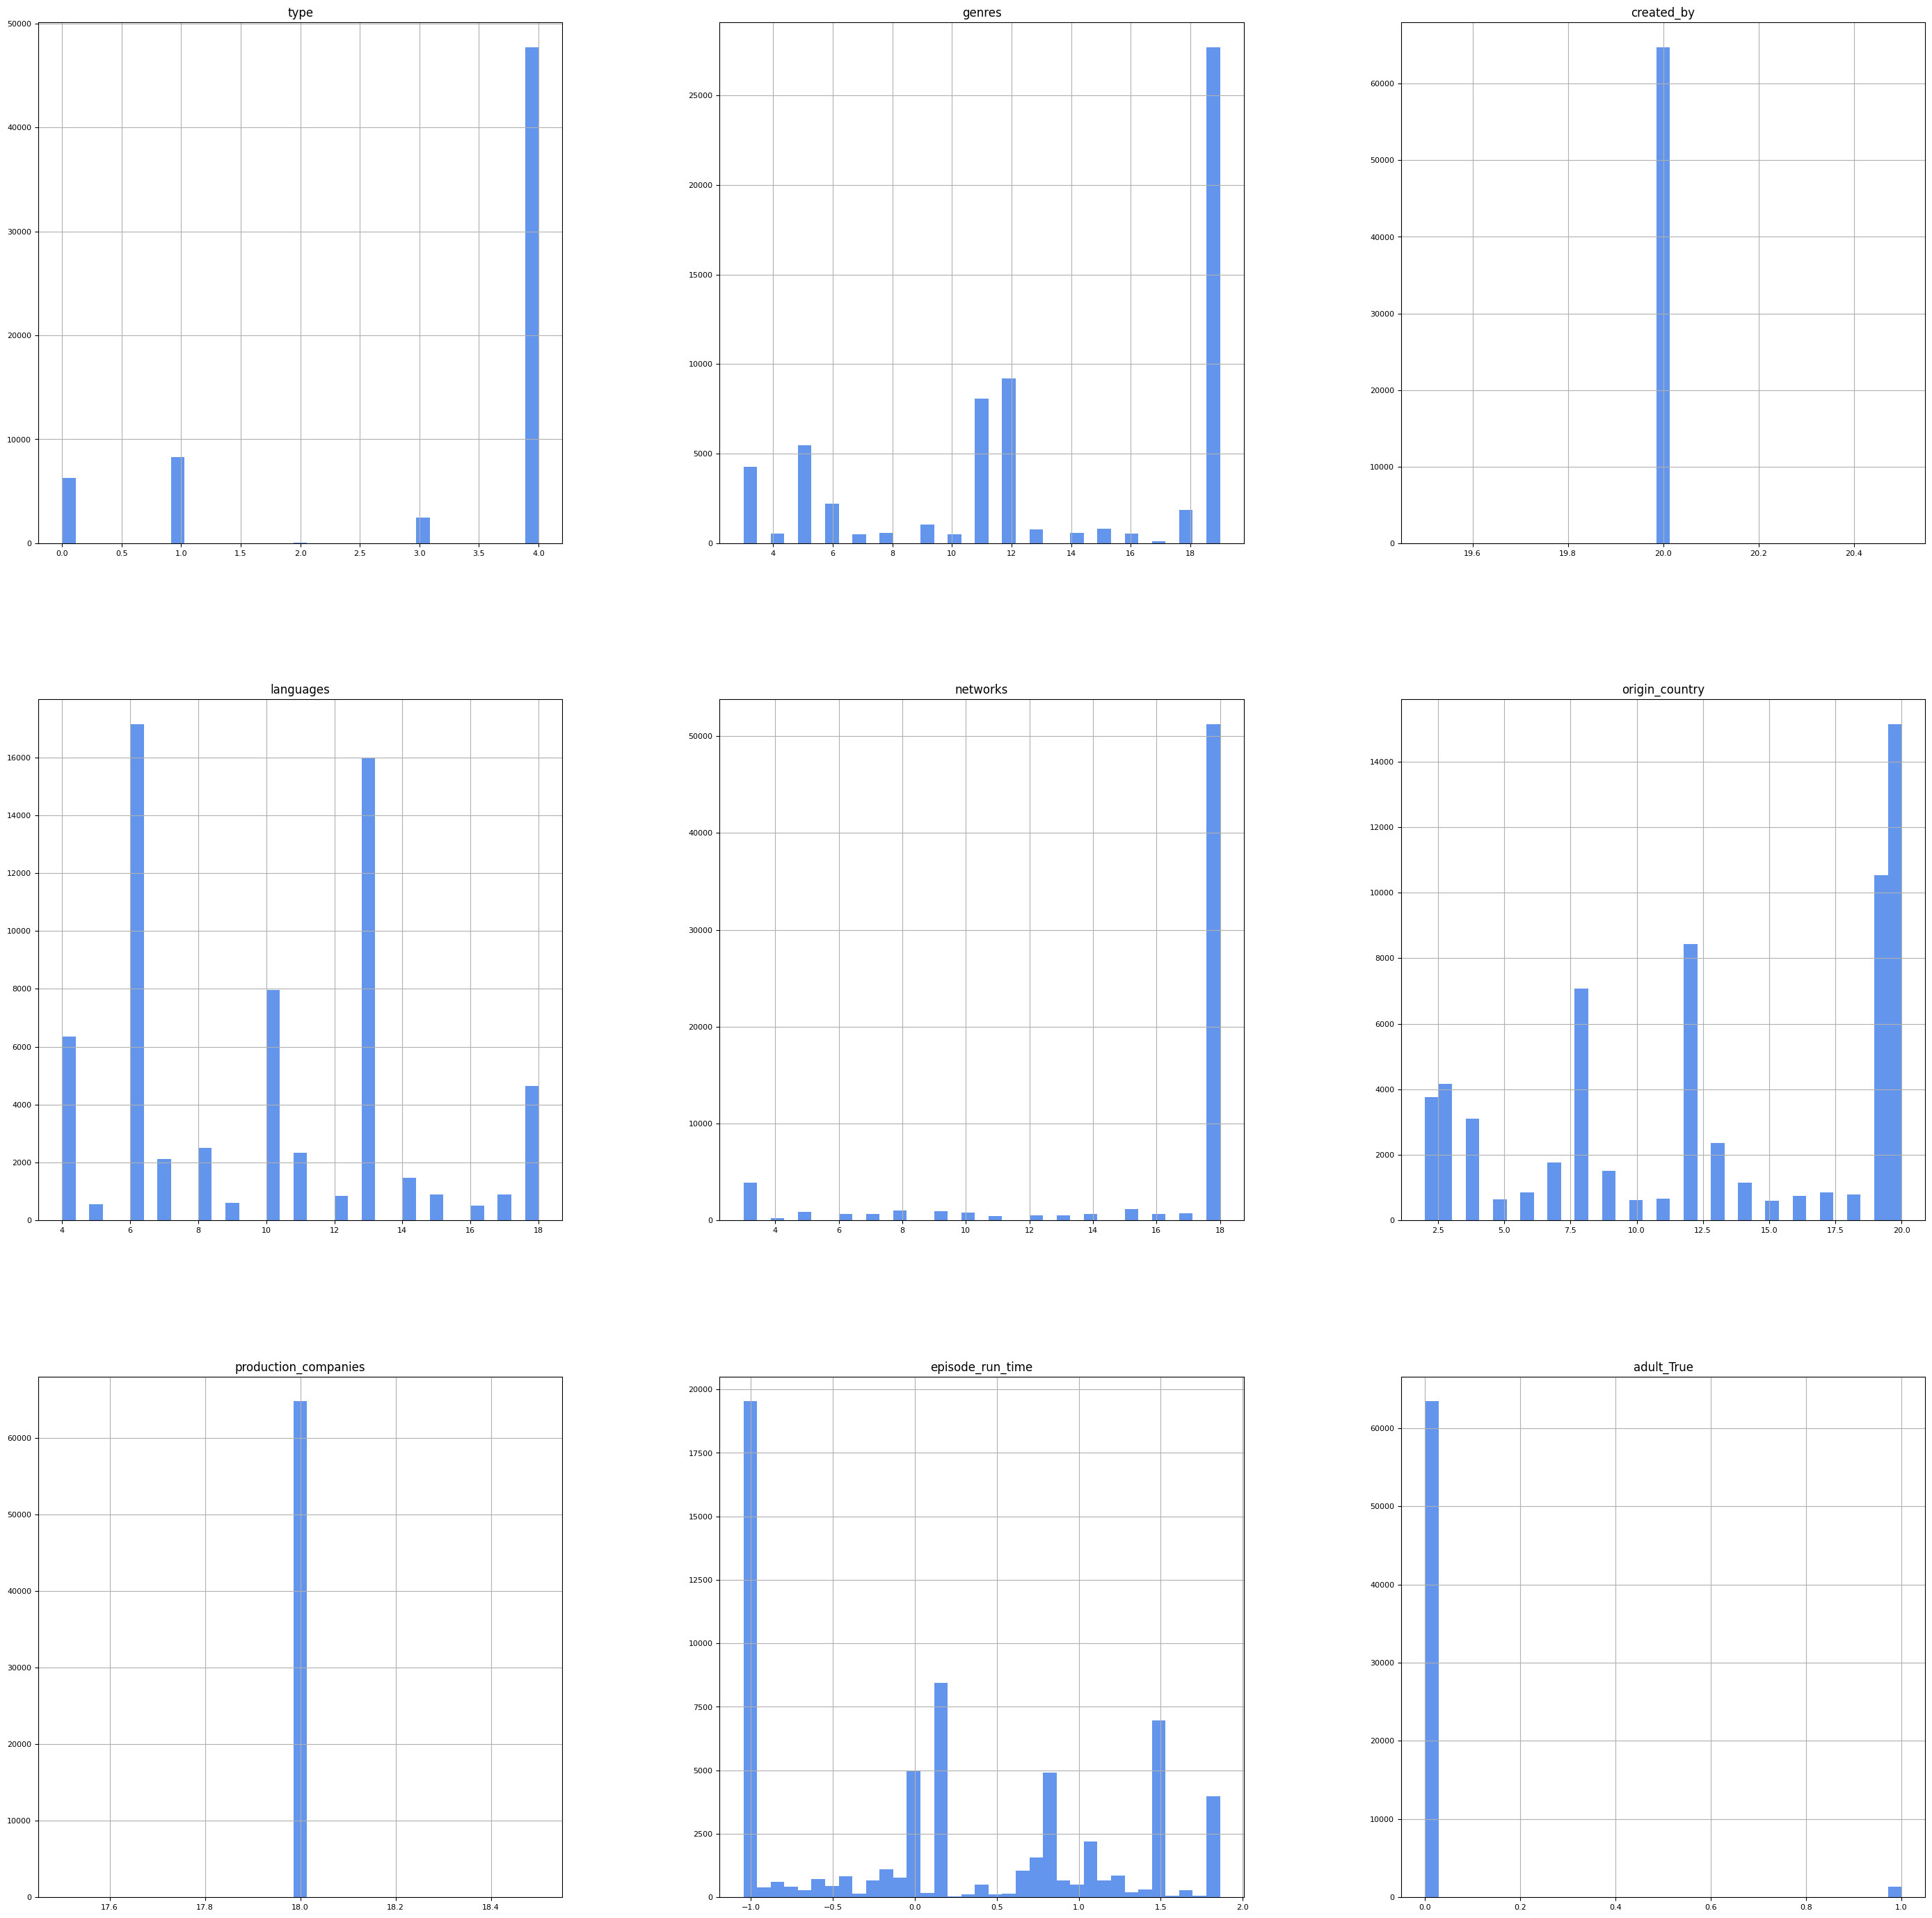

In [26]:
# Convert specified columns to float

columns_to_convert = ['type','genres', 'created_by', 'languages', 'networks','origin_country','production_companies','episode_run_time','adult_True']
tmdb_feng = tmdb_num[columns_to_convert].astype(float)
tmdb_feng.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "cornflowerblue");

# Skeuness

In [27]:
import pandas as pd # Make sure pandas is imported

def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(tmdb_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight) # Use pd.DataFrame instead of tmdb_num.DataFrame

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
<ipython-input-27-4bfe5cb68c9a>:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(tmdb_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight) # Use pd.DataFrame instead of tmdb_num.DataFrame


,skewness
air_time,7.348937
adult_True,6.739496
total_runtime,1.877938
weighted_vote_average,1.067884
number_of_episodes,0.948948
vote_count,0.931158
popularity,0.890423
id,0.694727
log_popularity,0.657328
popularity_log,0.651853


# Correlation

In [28]:
# TMDB Dataset Corrolation
tmdb_num.corr()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,type,genres,created_by,languages,...,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score
id,1.000000,NaN,-0.185753,-0.255111,-0.215414,-0.254210,-0.237254,0.004552,NaN,0.196100,...,-0.320213,-0.282964,NaN,NaN,NaN,NaN,NaN,-0.042968,-0.239737,-0.263963
number_of_seasons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_episodes,-0.185753,NaN,1.000000,0.226246,0.159883,0.561867,0.306977,-0.040276,NaN,0.048459,...,0.035361,0.687817,NaN,NaN,NaN,NaN,NaN,-0.263393,0.224389,0.291991
vote_count,-0.255111,NaN,0.226246,1.000000,0.742028,0.626191,0.050853,-0.124263,NaN,-0.095280,...,0.214825,0.279269,NaN,NaN,NaN,NaN,NaN,0.500132,0.976476,0.879666
vote_average,-0.215414,NaN,0.159883,0.742028,1.000000,0.439964,0.032771,-0.124311,NaN,-0.059935,...,0.179808,0.208505,NaN,NaN,NaN,NaN,NaN,0.437210,0.772305,0.947230
popularity,-0.254210,NaN,0.561867,0.626191,0.439964,1.000000,0.192811,-0.088749,NaN,-0.092486,...,0.194351,0.496195,NaN,NaN,NaN,NaN,NaN,0.117606,0.617611,0.676573
type,-0.237254,NaN,0.306977,0.050853,0.032771,0.192811,1.000000,0.016629,NaN,0.131167,...,-0.009495,0.229336,NaN,NaN,NaN,NaN,NaN,-0.175355,0.043399,0.079080
genres,0.004552,NaN,-0.040276,-0.124263,-0.124311,-0.088749,0.016629,1.000000,NaN,0.076368,...,-0.009139,-0.016709,NaN,NaN,NaN,NaN,NaN,-0.060721,-0.117945,-0.133320
created_by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
languages,0.196100,NaN,0.048459,-0.095280,-0.059935,-0.092486,0.131167,0.076368,NaN,1.000000,...,-0.049620,0.027801,NaN,NaN,NaN,NaN,NaN,-0.090138,-0.084788,-0.084301


#Feature Selection: Choosing the Right Ingredients for the Model

Feature selection is the process of selecting a subset of relevant features (variables, predictors) to use in building a machine learning model. It's a crucial step in the model development process because it can:

Improve Model Performance: By removing irrelevant or redundant features, you can reduce noise and overfitting, leading to better generalization and accuracy.

Reduce Computational Cost: Fewer features mean faster training and prediction times, especially for complex models and large datasets.

Enhance Model Interpretability: Simpler models with fewer features are easier to understand and explain, making them more trustworthy and actionable.

In [30]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor  # Changed to Regressors
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Import LinearSVR for regression tasks
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer # Import SimpleImputer


# 1. Clean 'episode_run_time' before feature engineering:
# Convert 'episode_run_time' to string type before using .str accessor

tmdb_num['episode_run_time'] = tmdb_num['episode_run_time'].astype(str)  # Convert to string

# Remove any non-digit characters and convert to numeric

tmdb_num['episode_run_time'] = tmdb_num['episode_run_time'].str.replace(r'\D+', '', regex=True)
tmdb_num['episode_run_time'] = pd.to_numeric(tmdb_num['episode_run_time'], errors='coerce').fillna(0)

# Using 'tmdb_eng' DataFrame containing the features and target variable
# Replace 'target_variable_column' with the actual name of your target variable column

X = tmdb_num.drop(columns=['popularity'])  # Features (all columns except the target)
y = tmdb_num['popularity']  # Target variable

# Ensure all columns in X are numeric This will convert any remaining non-numeric columns to numeric,
# replacing non-convertible values with NaN Then, it will impute NaN values with 0.

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'datetime64[ns]':  # Check for object and datetime types
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)  # Convert to numeric, handle errors and fill NaNs with 0
        except (ValueError, TypeError):
            X[col] = pd.factorize(X[col])[0]  # Use factorize for non-numeric columns

# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Impute NaN values using SimpleImputer
imputer = SimpleImputer(strategy='median') # Create an imputer object with the desired strategy
X = imputer.fit_transform(X) # Impute NaN values in X

# Get feature names after imputation (SimpleImputer converts to numpy array)
feature_names = tmdb_num.drop(columns=['popularity']).columns

# Fit models and determine if a feature is selected (1) or not (0)

lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Fit Ridge model
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

# Use LinearSVR for regression with continuous target
svm = LinearSVR(C=0.01).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingRegressor().fit(X, y)  # Changed to Regressor
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestRegressor().fit(X, y)  # Changed to Regressor
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
# Use feature_names instead of tmdb_eng.drop(columns=['popularity']).columns
selection_df = pd.DataFrame({
    'Feature': feature_names,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest', 'Ridge']].sum(axis=1)

# Output the results
print(selection_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.98342e-39): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                                      Feature  Lasso  SVM  GradientBoost  \
0                                          id      1    0              0   
1                           number_of_seasons      0    0              0   
2                          number_of_episodes      1    0              0   
3                                  vote_count      0    0              0   
4                                vote_average      1    0              0   
5                                        type      0    0              0   
6                                      genres      1    0              0   
7                                  created_by      0    0              0   
8                                   languages      0    0              0   
9                                    networks      0    0              0   
10                             origin_country      1    0              0   
11                       production_companies      0    0              0   
12          

# Multivariable Analysis
**Summarization and Selection of Variables**

The Lasso penalty here is controlled by alpha = 0.01. This penalty forces some coefficients to shrink to zero, effectively performing feature selection. A higher penalty (larger alpha) would result in more coefficients being zeroed out, and a lower penalty (smaller alpha) would retain more features

# Featuer Selection :Creating DataFrame with most valuable variables

Selected variables - recommended by 3 or more models

In [31]:
 #Selecting variables with a sum of selections >= 3

final_var = selection_df[selection_df['Sum'] >= 3]['Feature'].tolist()
tmdb_model = tmdb_eng[final_var].copy()
tmdb_model['popularity'] = tmdb_eng['popularity'].copy()

# Output the result to verify
tmdb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     82872 non-null  float64
 1   number_of_episodes     82872 non-null  float64
 2   vote_average           82872 non-null  float64
 3   genres                 82872 non-null  int64  
 4   origin_country         82872 non-null  int64  
 5   episode_run_time       82872 non-null  float64
 6   popularity_log         82872 non-null  float64
 7   air_time               82872 non-null  float64
 8   log_popularity         82872 non-null  float64
 9   weighted_vote_average  82872 non-null  float64
 10  popularity_score       82872 non-null  float64
 11  popularity             82872 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 7.6 MB


# Download & Save tmdb_model to my Google Drive

In [32]:
# Import necessary libraries
import pickle
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_model, file)
  print(f"tmdb_model saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eng is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl


#Importing Pickel file tmdb_model from my Google Drive

In [33]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_model = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_model.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl successfully.
         id  number_of_episodes  vote_average  genres  origin_country  \
0   39280.0           -0.840914     -0.787969      19              19   
1  222838.6           -0.525367      1.400545      12              12   
2  222838.6           -0.209820     -0.787969      19               5   
3   34835.0           -0.083601      1.031056      19              12   
4   42598.0           -0.840914     -0.787969       5              20   

   episode_run_time  popularity_log  air_time  log_popularity  \
0          0.200501        0.385265      56.0        0.904220   
1          1.031072        1.002042      28.0        1.314755   
2         -1.045356        0.385265      63.0        0.904220   
3          0.200501        1.216670      77.0        1.476119 